In [ ]:
!pip install dython

In [1]:
#importing data libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from dython import nominal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [22]:
data = pd.read_csv('zameen.csv')
data

,city,property_type,page_url,location,price,area,beds,baths
0,Islamabad,House,zameen.com/Property/gulberg_residencia_block_i...,"Gulberg Dream Villas, Gulberg Residencia - Blo...",3.1 Crore,7 Marla,4,5
1,Islamabad,House,zameen.com/Property/islamabad_g_15_a_house_of_...,"G-15, Islamabad",3 Crore,8 Marla,5,5
2,Islamabad,House,zameen.com/Property/islamabad_f_6_huge_opportu...,"F-6, Islamabad",14.75 Crore,17.8 Marla,5,5
3,Islamabad,House,zameen.com/Property/bahria_enclave_bahria_encl...,"Bahria Enclave - Sector C, Bahria Enclave",9 Crore,1 Kanal,6,6
4,Islamabad,House,zameen.com/Property/dha_defence_phase_2_dha_ph...,"DHA Phase 2 - Sector C, DHA Defence Phase 2",9.5 Crore,1 Kanal,6,6
...,...,...,...,...,...,...,...,...
10085,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",4 Crore,2.5 Kanal,7,8
10086,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",4.4 Crore,2.5 Kanal,7,7
10087,Abbottabad,farmhouse,zameen.com/Property/abbottabad_main_mansehra_r...,"Main Mansehra Road, Abbottabad",2.5 Crore,1 Kanal,3,3
10088,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",4.4 Crore,2.5 Kanal,4,4


In [3]:
#standardization of area and price column

def kanal_to_sqft(x):
  y=x.translate({ord(','): None})
  return float(y) * 5445

def marla_to_sqft(x):
  y=x.translate({ord(','): None})
  return float(y) * 272.251

def sqYd_to_sqft(x):
  y=x.translate({ord(','): None})
  return float(y) * 9

def sqft(x):
  y=x.translate({ord(','):None })
  return y

#converts all prices into lakh 
def preprocess_price(x): 
  value, suffix = x.split(' ')
  if suffix == 'Crore':
     value = float(value) * 100
  return value

#converts area into sqft 
def preprocess_area(x): 
  splitted = x.split(' ')

  value = splitted[0]
  units = splitted[1:]

  if len(units) == 1 and units[0] == 'Kanal':
      value = kanal_to_sqft(value)
  elif len(units) == 1 and units[0] == 'Marla':
    value= marla_to_sqft(value)
  elif len(units) == 2:
    suffix_1, suffix_2 = units
    if suffix_1 == 'Sq.' and suffix_2 == 'Yd.':
      value = sqYd_to_sqft(value)
  else:
     value = sqft(value)
  return value

#applies above function on price and area columns of this dataframe 
data['price'] = data['price'].apply(lambda x: preprocess_price(x))
data['area'] = data['area'].apply(lambda x: preprocess_area(x))

In [4]:
data

,city,property_type,page_url,location,price,area,beds,baths
0,Islamabad,House,zameen.com/Property/gulberg_residencia_block_i...,"Gulberg Dream Villas, Gulberg Residencia - Blo...",310.0,1905.757,4,5
1,Islamabad,House,zameen.com/Property/islamabad_g_15_a_house_of_...,"G-15, Islamabad",300.0,2178.008,5,5
2,Islamabad,House,zameen.com/Property/islamabad_f_6_huge_opportu...,"F-6, Islamabad",1475.0,4846.0678,5,5
3,Islamabad,House,zameen.com/Property/bahria_enclave_bahria_encl...,"Bahria Enclave - Sector C, Bahria Enclave",900.0,5445.0,6,6
4,Islamabad,House,zameen.com/Property/dha_defence_phase_2_dha_ph...,"DHA Phase 2 - Sector C, DHA Defence Phase 2",950.0,5445.0,6,6
...,...,...,...,...,...,...,...,...
10085,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",400.0,13612.5,7,8
10086,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",440.0,13612.5,7,7
10087,Abbottabad,farmhouse,zameen.com/Property/abbottabad_main_mansehra_r...,"Main Mansehra Road, Abbottabad",250.0,5445.0,3,3
10088,Abbottabad,farmhouse,zameen.com/Property/abbottabad_shimla_hill_roa...,"Shimla Hill Road, Abbottabad",440.0,13612.5,4,4


In [5]:
#converts data into float 
data = data.astype({'price':'float','area':'float'})

In [6]:
#check null value rows and columns 
data.isnull().any()

city             False
property_type    False
page_url         False
location         False
price            False
area             False
beds             False
baths            False
dtype: bool

In [7]:
#checks which type of features are present in the data 

#checks categorical data 
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

#checks integer type data 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
#checks float type data 
float_ = (data.dtypes == 'float')
float_cols = list(float_[float_].index)
print("Float variables:",len(float_cols))

Categorical variables: 4
Integer variables: 2
Float variables: 2


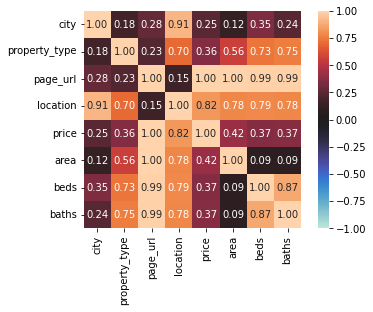

{'corr':                    city  property_type  page_url  location     price  \
 city           1.000000       0.176392  0.275612  0.913025  0.247290   
 property_type  0.176392       1.000000  0.225503  0.697225  0.363372   
 page_url       0.275612       0.225503  1.000000  0.150731  0.995541   
 location       0.913025       0.697225  0.150731  1.000000  0.824234   
 price          0.247290       0.363372  0.995541  0.824234  1.000000   
 area           0.117528       0.562394  0.999882  0.776488  0.415920   
 beds           0.350588       0.726708  0.991955  0.785035  0.366958   
 baths          0.239036       0.751283  0.989948  0.779133  0.371134   
 
                    area      beds     baths  
 city           0.117528  0.350588  0.239036  
 property_type  0.562394  0.726708  0.751283  
 page_url       0.999882  0.991955  0.989948  
 location       0.776488  0.785035  0.779133  
 price          0.415920  0.366958  0.371134  
 area           1.000000  0.089039  0.089642  
 bed

In [8]:
#correlation between different features
nominal.associations(data, nominal_columns=['city','property_type','page_url','location'])

1-City and location correlation value = 0.913 which is much closer to 1. This represents they are highly correlated so we can drop one feature.


2-Page_url is highly correlated with area,beds and bath so we can drop this feature as well.

In [9]:
#drops page_url and location feature from the data 
data.drop(['page_url','location'],axis=1,inplace=True)
data

,city,property_type,price,area,beds,baths
0,Islamabad,House,310.0,1905.7570,4,5
1,Islamabad,House,300.0,2178.0080,5,5
2,Islamabad,House,1475.0,4846.0678,5,5
3,Islamabad,House,900.0,5445.0000,6,6
4,Islamabad,House,950.0,5445.0000,6,6
...,...,...,...,...,...,...
10085,Abbottabad,farmhouse,400.0,13612.5000,7,8
10086,Abbottabad,farmhouse,440.0,13612.5000,7,7
10087,Abbottabad,farmhouse,250.0,5445.0000,3,3
10088,Abbottabad,farmhouse,440.0,13612.5000,4,4


<AxesSubplot: xlabel='city', ylabel='price'>

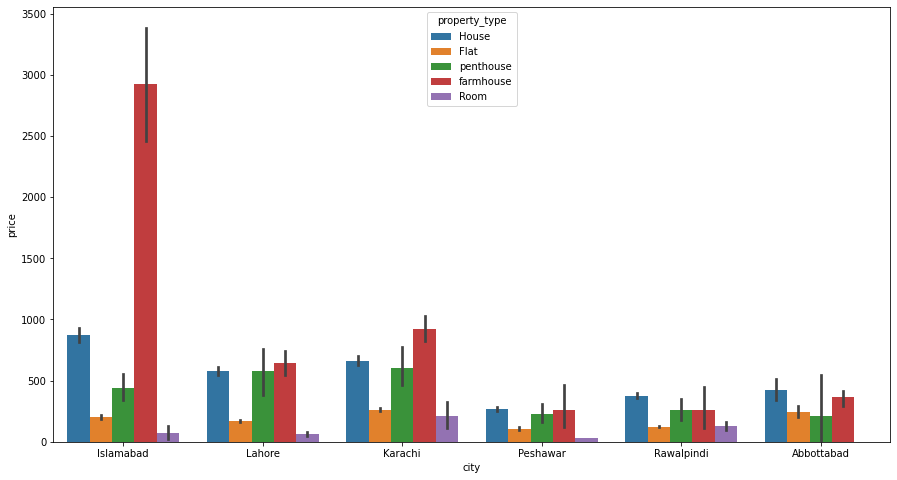

In [10]:
#city and property_type affect on price 
#categorical data
plt.figure(figsize=(15,8))
sns.barplot(data=data, x="city", y="price", hue="property_type")

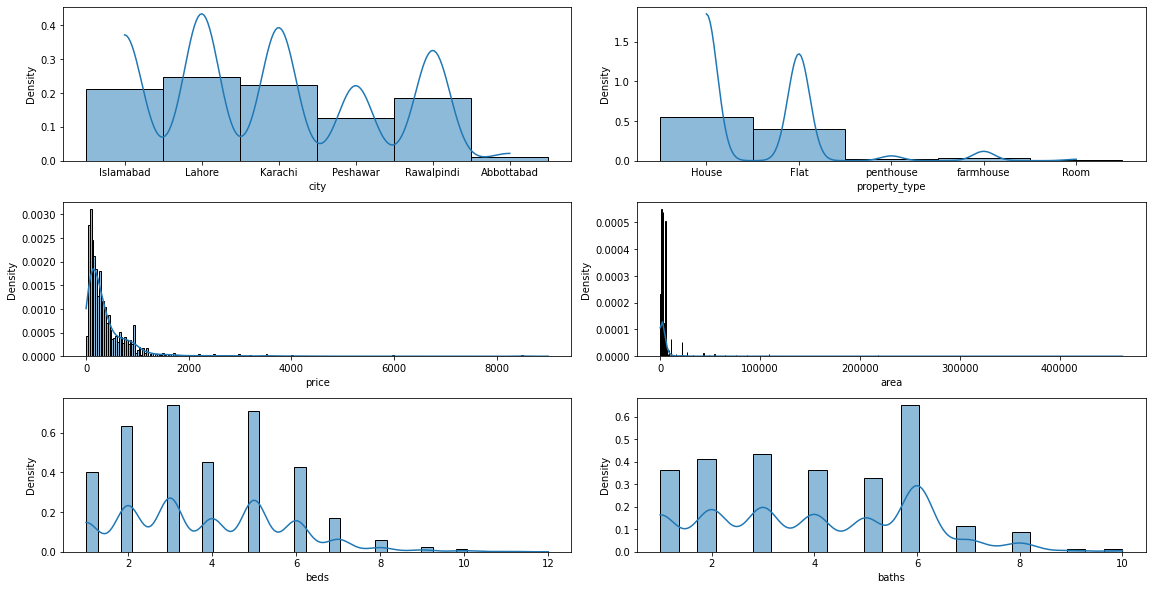

In [11]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(data):
    plt.subplot(6,2,index+1)
    sns.histplot(data.loc[:,col], kde=True, stat="density", linewidth=1);
fig.tight_layout(pad=1.0);

In [12]:
#conversion of categorical data 
#one hot encoder 

#selecting categorical features and adding them into a list 
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

#implementation
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
#normalization of data 
#MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df_final.values)
scaled_data = pd.DataFrame(df_scaled,columns=df_final.columns,index=df_final.index)
scaled_data

,price,area,beds,baths,x0_Abbottabad,x0_Islamabad,x0_Karachi,x0_Lahore,x0_Peshawar,x0_Rawalpindi,x1_Flat,x1_House,x1_Room,x1_farmhouse,x1_penthouse
0,0.034337,0.003902,0.272727,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.033226,0.004491,0.363636,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.163796,0.010257,0.363636,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.099900,0.011551,0.454545,0.555556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.105456,0.011551,0.454545,0.555556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,0.044338,0.029202,0.545455,0.777778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10086,0.048783,0.029202,0.545455,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10087,0.027670,0.011551,0.181818,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10088,0.048783,0.029202,0.272727,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#model 
X = scaled_data.drop(['price'], axis=1) 
Y = scaled_data['price'] #target feature 
 
#split dataset into training and testing with no shuffling 
x_train, x_test, y_train, y_test = train_test_split( X, Y, train_size=0.8, test_size=0.2, random_state=90)

Machine learning regression algorithm

In [15]:
model_l = LinearRegression()
model_l.fit(x_train,y_train)
pred_l = model_l.predict(x_test)
mean_squared_error(pred_l, y_test)

0.004265377500289675

Deep learning regression model 

In [16]:
model = Sequential()
model.add(Dense(500, input_dim=14, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [17]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
253/253 [==============================] - 2s 3ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 2/20
253/253 [==============================] - 1s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3/20
253/253 [==============================] - 1s 3ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 5/20
253/253 [==============================] - 1s 3ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 6/20
253/253 [==============================] - 1s 4ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 7/20
253/253 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 8/20
253/253 [==============================] - 1s 4ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 9/20
253/253 [==============================] - 1s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 10/2

In [18]:
prediction= model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,prediction))) 

64/64 [==============================] - 0s 2ms/step
0.04615344851409763


In [19]:
#Inference
#input should be an array of the features like in train/test data in the order
#[[area	beds	baths	x0_Abbottabad	x0_Islamabad	x0_Karachi	x0_Lahore	x0_Peshawar	x0_Rawalpindi	x1_Flat	x1_House	x1_Room	x1_farmhouse	x1_penthouse]]
input = [[0.003902,	0.3,	0.4,	0.0	,1.0,	0.0	,0.0,	0.0,	0.0	,0.0,	1.0	,0.0,	0.0	,0.0]]
inference = model.predict(input)
print(inference)

1/1 [==============================] - 0s 71ms/step
[[0.04484672]]


In [20]:
rescaled = list(inference[0]) + list(input[0]) 
print(rescaled)

[0.04484672, 0.003902, 0.3, 0.4, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [21]:
print("price",sc.inverse_transform([rescaled])[0][0])

price 404.57564222067595
